In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [3]:
snapshotName='DLC_resnet50_WhiteRabbitMar18shuffle1_200000'
evalResults = pd.read_hdf(snapshotName +'-snapshot-200000.h5')

In [4]:
allBodyParts = list(evalResults.columns.levels[1])

In [5]:
def extractBodypart(bodypartname,likelihood=0.99):
    """ Filters evaluation results based on the specified bodypart and likelihood percentage 
    (less than the specified threshold) """
    tophead = evalResults[snapshotName, bodypartname]['likelihood'].reset_index()
    tophead = tophead.rename(columns={"index":"frame"})
    tophead["frame"] = tophead.frame.apply(lambda x: x.split("/")[2].split(".")[0])
    tophead = tophead[tophead["likelihood"] <= likelihood]
    return tophead

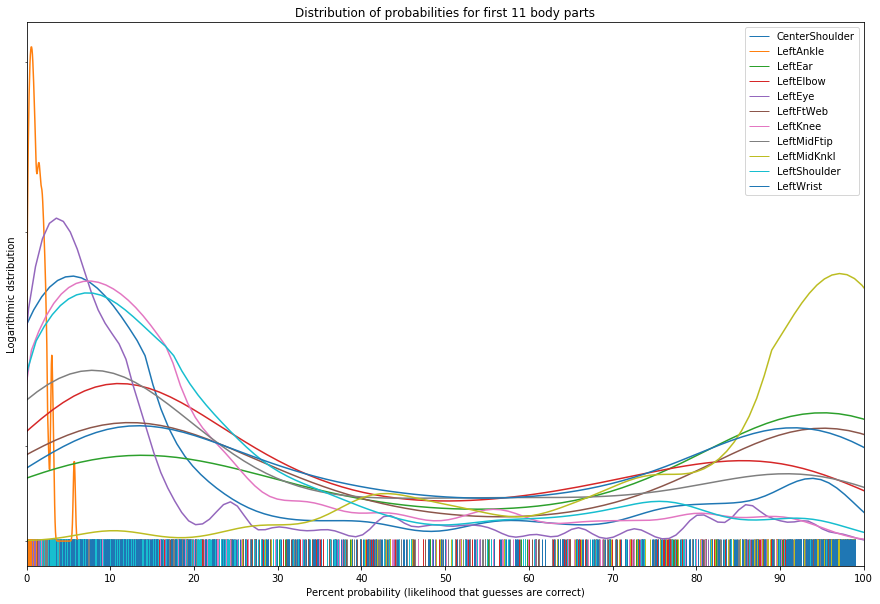

In [6]:
legendParts = []
plt.figure(figsize=(15,10))
for part in allBodyParts[0:11]:
    marker = extractBodypart(part)
    ax = sns.distplot(marker.likelihood,hist=False,rug=True);
    legendParts.append(part); 
ax.set_yscale('symlog');
plt.legend(legendParts);
plt.xlim(0,1);
ax.set_xticks(np.arange(0,1.1,step=0.1));
ax.set_xticklabels(np.arange(0,110,step=10));
ax.set_yticks([]);
ax.set_yticklabels([]);
ax.set_title('Distribution of probabilities for first 11 body parts');
ax.set_ylabel('Logarithmic dstribution');
ax.set_xlabel('Percent probability (likelihood that guesses are correct)');

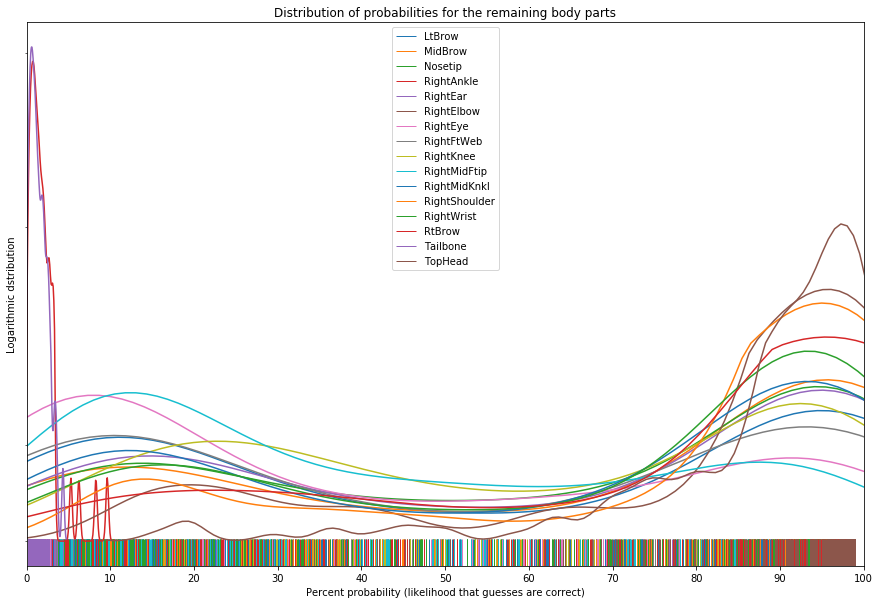

In [7]:
legendParts = []
plt.figure(figsize=(15,10))
for part in allBodyParts[11:]:
    marker = extractBodypart(part)
    ax = sns.distplot(marker.likelihood,hist=False,rug=True);
    legendParts.append(part); 
ax.set_yscale('symlog');
plt.legend(legendParts);
plt.xlim(0,1);
ax.set_xticks(np.arange(0,1.1,step=0.1));
ax.set_xticklabels(np.arange(0,110,step=10));
ax.set_yticks([]);
ax.set_yticklabels([]);
ax.set_title('Distribution of probabilities for the remaining body parts');
ax.set_ylabel('Logarithmic dstribution');
ax.set_xlabel('Percent probability (likelihood that guesses are correct)');